In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score



In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In [25]:
# 4️⃣ CreditScore

# Customer’s credit score (e.g., 300–850 range).

# Higher score → better financial reliability.

# Important feature for churn prediction.


# 5️⃣ Geography

# Customer’s country (France, Spain, Germany etc.).

# Categorical feature.

# Often one-hot encoded.


# 6️⃣ Gender

# Male / Female.

# Binary categorical.

# Encode as 0/1.


# 7️⃣ Age

# Customer age.

# Very important in churn.

# Older customers sometimes churn more (depends on data).


# 8️⃣ Tenure

# Number of years customer stayed with bank.

# Low tenure → higher churn probability usually.


# 9️⃣ Balance

# Account balance.

# 0 balance customers sometimes churn more.


# 🔟 NumOfProducts

# Number of bank products (loan, credit card, etc.).

# Important behavior feature.

# Interesting insight:

# Customers with 2 products usually less likely to churn.

# 1 or 3+ may churn more.

# 1️⃣1️⃣ HasCrCard

# 1 = Has credit card

# 0 = No credit card

# Binary feature.

# 1️⃣2️⃣ IsActiveMember

# 1 = Active customer

# 0 = Inactive

# Very important feature.

# Inactive customers churn more.

# 1️⃣3️⃣ EstimatedSalary

# Customer’s estimated income.

# Sometimes weak predictor.

# Still useful.

# 1️⃣4️⃣ Exited 🎯 (Target Variable)

# 1 = Customer left bank

# 0 = Customer stayed

# This is what you predict.

# 1️⃣5️⃣ Complain

# 1 = Customer made complaint

# 0 = No complaint

# Strong churn indicator.

# 1️⃣6️⃣ Satisfaction Score

# Customer satisfaction rating (e.g., 1–5).

# Lower score → higher churn risk.

# 1️⃣7️⃣ Card Type

# Type of card (GOLD, SILVER, DIAMOND etc.)

# Categorical feature.

# Encode with one-hot encoding.

# 1️⃣8️⃣ Point Earned

# Reward/loyalty points earned.

# Behavior-based feature.

# Could correlate with engagement.

<h2>Data Preprocessing</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname','Complain'])

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


<h2>For Categorical Columns</h2>

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Text(0.5, 1.0, 'Geography Count')

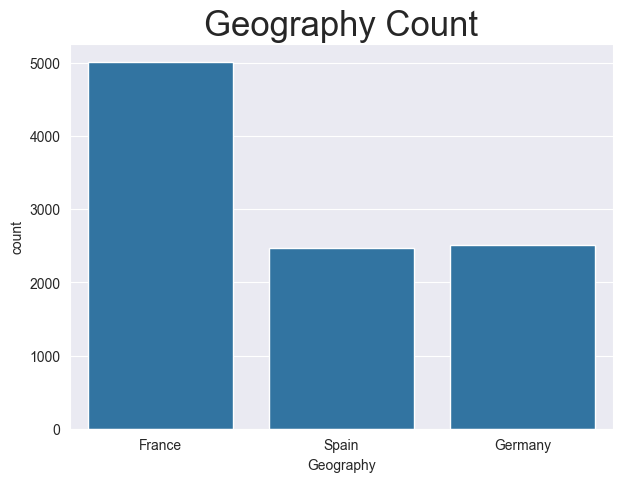

In [9]:

plt.figure(figsize=(7,5))
sns.countplot(x="Geography", data=df).set_title("Geography Count", fontsize=25)

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Count')

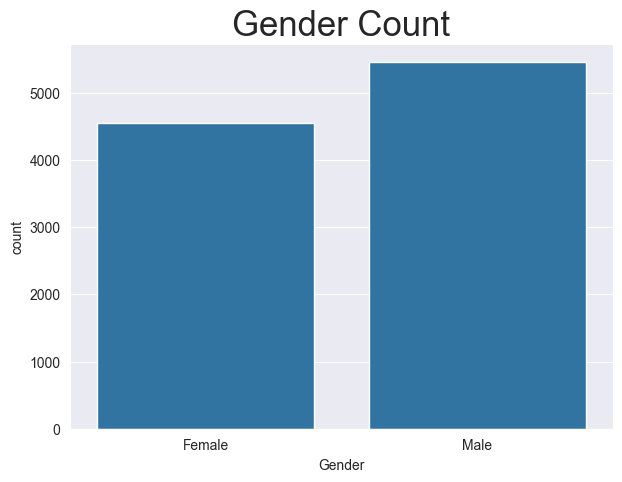

In [11]:

plt.figure(figsize=(7,5))
sns.countplot(x="Gender", data=df).set_title("Gender Count", fontsize=25)

In [12]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Text(0.5, 1.0, 'HasCrCard Count')

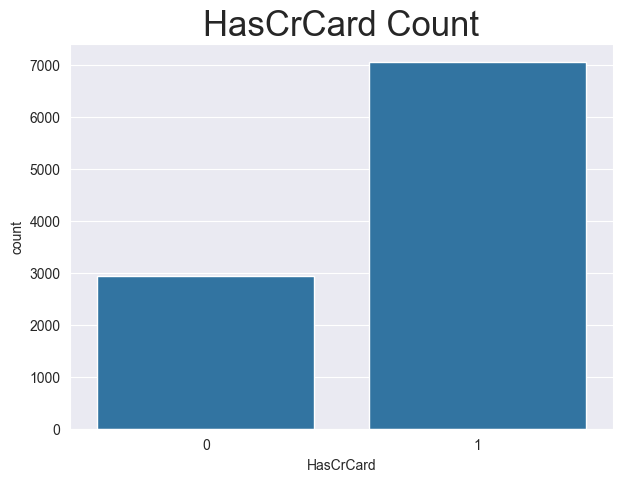

In [13]:

plt.figure(figsize=(7,5))
sns.countplot(x="HasCrCard", data=df).set_title("HasCrCard Count", fontsize=25)

<h2>One-hot Encoding</h2>

In [14]:
df = pd.get_dummies(df,columns=['Gender','Card Type','Geography'],drop_first=True)

In [15]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,False,False,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,False,True,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,True,False,False,False,True


In [16]:
X = df.drop(columns=['Exited'])  
y = df['Exited']  

<p>X indicates all columns without exited , because exited in Y is the targeted column.</p>

In [17]:
# import sklearn
# print(sklearn.__version__)

<h2>Train Test</h2>

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=y)
#Churn is imbalanced (~20%).
# Stratify keeps same churn ratio in train & test.

<h3>Logistic Regression</h3>

<p>Logistic regression predicts probability of class 1.</p>

In [19]:

log_pipeline = Pipeline([
    ('processor',StandardScaler()),
    ('model',LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
        ))
])

log_pipeline.fit(X_train,y_train)

train_pred = log_pipeline.predict(X_train)
test_pred = log_pipeline.predict(X_test)

train_accuracy = accuracy_score(y_train,train_pred)
test_accuracy = accuracy_score(y_test,test_pred)

log_cm = confusion_matrix(y_test,test_pred)
log_cr = classification_report(y_test,test_pred)

log_probs = log_pipeline.predict_proba(X_test)[:,1]
log_roc = roc_auc_score(y_test,log_probs)
# log_cross = cross_val_score(y_test,test_pred)

print("Train Accuracy :",train_accuracy)
print("\nTest Accuracy :",test_accuracy)
print("\nConfusion metrics :\n",log_cm)
print("\nClassification report :\n",log_cr)
print("\nROC_AUC score :",log_roc)
# print("\n",log_cross)



Train Accuracy : 0.71025

Test Accuracy : 0.711

Confusion metrics :
 [[1127  465]
 [ 113  295]]

Classification report :
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1592
           1       0.39      0.72      0.51       408

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000


ROC_AUC score : 0.7797181372549019


<h3>StratifiedKFold : </h3> 

<p>Each class has the same proportion as original dataset</p>

In [20]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=42 
                      )
cv_log_scores = cross_val_score(
    log_pipeline,
    X,
    y,
    cv=skf,
    scoring='roc_auc'
)
# print("CV ROC-AUC:", cv_log_scores)
print("SK-Fold ROC-AUC scores per fold:", cv_log_scores)
print("Mean CV ROC-AUC:", cv_log_scores.mean())

SK-Fold ROC-AUC scores per fold: [0.76323098 0.75760081 0.76752944 0.77375372 0.7755583 ]
Mean CV ROC-AUC: 0.767534650811751


<h5>Find out best threshold value</h5>

In [21]:

thresholds = (0.3,0.4,0.5,0.6,0.7,0.8)
recall = []
precision = []
f1 = []

for threshold in thresholds:
    y_pred_t = (log_probs >= threshold).astype(int)
    recall.append(recall_score(y_test,y_pred_t))
    precision.append(precision_score(y_test,y_pred_t))
    f1.append(f1_score(y_test,y_pred_t))


print("Recall Scores: \n",recall)
print("\nPrecision Scores : \n",precision)
print("\nF1 Scores : \n",f1)

Recall Scores: 
 [0.9215686274509803, 0.8406862745098039, 0.7230392156862745, 0.5686274509803921, 0.38235294117647056, 0.19852941176470587]

Precision Scores : 
 [0.2678062678062678, 0.3251184834123223, 0.3881578947368421, 0.46123260437375746, 0.5397923875432526, 0.6136363636363636]

F1 Scores : 
 [0.41501103752759383, 0.4688995215311005, 0.5051369863013698, 0.5093304061470911, 0.44763271162123386, 0.3]


Above all threshold values 0.6 is best cause it has 51% f1_score and balances both recall and precision.

In [22]:

# Get cross-validated probabilities
y_probs_cv = cross_val_predict(
    log_pipeline,
    X,
    y,
    cv=skf,
    method='predict_proba'
)[:,1]  # take probability of class 1

# Threshold tuning
best_threshold = 0.6
y_pred_cv = (y_probs_cv >= best_threshold).astype(int)

print("Train Accuracy :",train_accuracy)
print("\nTest Accuracy :",test_accuracy)
print("Confusion Matrix (SK-Fold CV):\n", confusion_matrix(y, y_pred_cv))
print("\nClassification Report (SK-Fold CV):\n", classification_report(y, y_pred_cv))

Train Accuracy : 0.71025

Test Accuracy : 0.711
Confusion Matrix (SK-Fold CV):
 [[6624 1338]
 [ 938 1100]]

Classification Report (SK-Fold CV):
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      7962
           1       0.45      0.54      0.49      2038

    accuracy                           0.77     10000
   macro avg       0.66      0.69      0.67     10000
weighted avg       0.79      0.77      0.78     10000



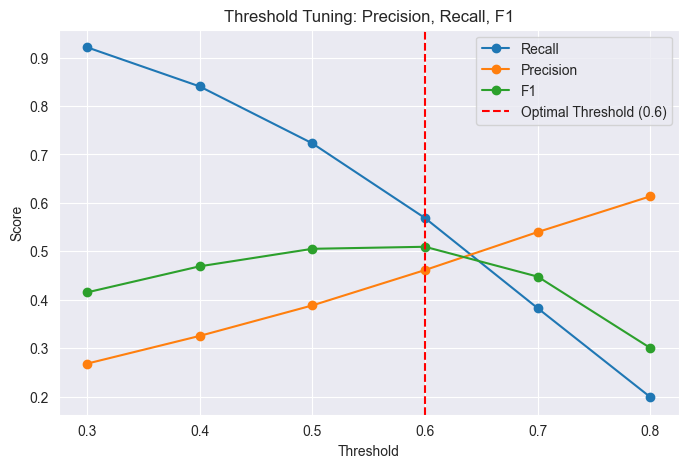

In [23]:
# Plot Threshold vs Scores
plt.figure(figsize=(8,5))
plt.plot(thresholds, recall, label='Recall', marker='o')
plt.plot(thresholds, precision, label='Precision', marker='o')
plt.plot(thresholds, f1, label='F1', marker='o')
plt.axvline(best_threshold, color='red', linestyle='--', label='Optimal Threshold (0.6)')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning: Precision, Recall, F1")
plt.legend()
plt.show()

<h3>GridSearch :</h3>
<p>Try multiple hyperparameter combination automatically</p>

f1_score > best F1 Score , cause f1_score is actual performance depend on both training and testing data . But grid.best_score_  only consider the training data.

✅ So:

f1_score (test) > best_score_ →  model generalized well to the test set.

f1_score (test) < best_score_ → model may be overfitting on training data.

In [24]:

# Define the parameter grid
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],   # Regularization strength
    'model__penalty': ['l1', 'l2'],    # L1 = sparse / feature selection, L2 = standard
    'model__solver': ['saga']          # 'saga' supports both L1 and L2
}

# Wrap your pipeline in GridSearchCV
grid = GridSearchCV(
    log_pipeline,        # Pipeline we defined earlier
    param_grid,
    scoring='f1',        # Optimize for F1 (good for imbalanced churn)
    cv=5,                # 5-fold Stratified CV
    n_jobs=-1            # Use all CPU cores for speed
)

# Fit GridSearch to training data
grid.fit(X_train, y_train)

# Best hyperparameters and best CV F1
print("Best Hyperparameters:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_probs = best_model.predict_proba(X_test)[:,1]

# Optional: tune threshold
thresholds = np.arange(0.3, 0.81, 0.05)
f1_list = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_list.append(f1_score(y_test, y_pred_t))

best_threshold = thresholds[np.argmax(f1_list)]
y_pred_best = (y_probs >= best_threshold).astype(int)

print("\nOptimal Threshold:", best_threshold)
print("\nF1 at Optimal Threshold:", f1_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_probs))

Best Hyperparameters: {'model__C': 0.01, 'model__penalty': 'l1', 'model__solver': 'saga'}
Best F1 Score (CV): 0.4972582295340938

Optimal Threshold: 0.49999999999999994

F1 at Optimal Threshold: 0.5108601216333623

Confusion Matrix:
 [[1143  449]
 [ 114  294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1592
           1       0.40      0.72      0.51       408

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.80      0.72      0.74      2000


ROC-AUC Score: 0.7824200660163563


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline=Pipeline([
    ('model',RandomForestClassifier(max_depth=12,         # Prevents trees from growing too deep → reduces overfitting
                                    n_estimators = 200,   # More trees → stable predictions
                                    min_samples_leaf = 5, # No tiny leaves → model generalizes better
                                    min_samples_split = 5, #prevent splitting small nodes
                                    max_features = 'sqrt', #controls feature randomness
                                    random_state=42,
                                    class_weight='balanced' # Handles imbalance of churn vs non-churn
                                    ))
])

rf_pipeline.fit(X_train,y_train)
pred_train = rf_pipeline.predict(X_train)
pred_test = rf_pipeline.predict(X_test)

rf_train_acc = accuracy_score(y_train,pred_train)
rf_test_acc = accuracy_score(y_test, pred_test)

rf_cm = confusion_matrix(y_test,pred_test)
rf_cr = classification_report(y_test, pred_test)

rf_y_probs = rf_pipeline.predict_proba(X_test)[:,1]
rf_roc = roc_auc_score(y_test,rf_y_probs)

print("\nTrain accuracy : ",rf_train_acc)
print("\nTest accuracy : ",rf_test_acc)
print("\nConfusion metrics : \n",rf_cm)
print("\nClassification Report : \n",rf_cr)
print("\nROC_AUC scores : ",rf_roc)



Train accuracy :  0.919625

Test accuracy :  0.849

Confusion metrics : 
 [[1425  167]
 [ 135  273]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1592
           1       0.62      0.67      0.64       408

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000


ROC_AUC scores :  0.8734912306631195


In [71]:
thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
t_hold = []
rf_recall = []
rf_precision = []
rf_f1 = []


for threshold in thresholds :
    rf_y_pr = (rf_y_probs >= threshold).astype(int)
    t_hold.append(threshold)
    rf_recall.append(recall_score(y_test,rf_y_pr))
    rf_precision.append(precision_score(y_test,rf_y_pr))
    rf_f1.append(f1_score(y_test,rf_y_pr))




# print("Recall : \n",rf_recall)
# print("\nPrecision : \n",rf_precision)
# print("\nF1_Scores : \n",rf_f1)


frame = pd.DataFrame({
    'Threshold' : t_hold,
    'Recall' : rf_recall,
    'Precision' : rf_precision,
    'F1_Scores': rf_f1
}).sort_values(by='F1_Scores',ascending=False)
print(frame)

   Threshold    Recall  Precision  F1_Scores
2        0.5  0.669118   0.620455   0.643868
3        0.6  0.566176   0.717391   0.632877
1        0.4  0.762255   0.514901   0.614625
4        0.7  0.426471   0.816901   0.560386
0        0.3  0.845588   0.411695   0.553772
5        0.8  0.262255   0.906780   0.406844


In [72]:
best_threshold = 0.5
rf_y_best_probs = (rf_y_probs >= best_threshold).astype(int)


print("\nConfusion metrics : \n",confusion_matrix(y_test,rf_y_best_probs))
print("\nClassification Report : \n",classification_report(y_test,rf_y_best_probs))



Confusion metrics : 
 [[1425  167]
 [ 135  273]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1592
           1       0.62      0.67      0.64       408

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000

